# Stock Price Prediction
[Source]()
***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Load Data

In [ ]:
stock_data = yf.download("AAPL", start="2015-01-01", end="2023-01-01")

In [3]:
data = stock_data['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Function to create sequences of past prices
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60  # last 60 days predict the next day
X, y = create_sequences(data, sequence_length)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Model

In [ ]:
model = Sequential([LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),Dropout(0.2),LSTM(50, return_sequences=False),Dropout(0.2),Dense(25),Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), verbose=0)

In [5]:
predictions = model.predict(X_test)
# Rescale
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)
# RMSE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f"Root Mean Squared Error: {rmse}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Root Mean Squared Error: 7.101724681912697


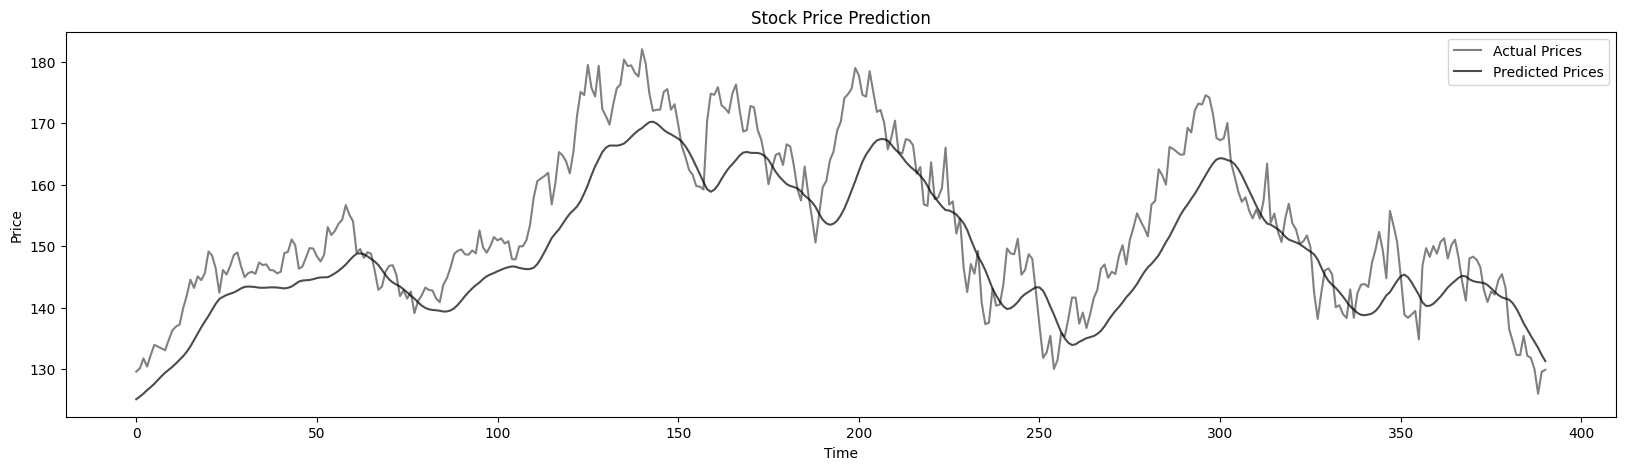

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(y_test_rescaled, label='Actual Prices', color='grey')
plt.plot(predictions, label='Predicted Prices', color='black', alpha=0.7)
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

# Summary

The final model has a Root Mean Squared Error of `7.10172`.

**End**